# Importing Pacakages

In [108]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('punkt')
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading data

In [109]:
df = pd.read_csv('train.csv')
df = df.sample(frac = 1)
df

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
1781209,2,these are my 5th pair,I love the subwoofer and these are also good w...
1201440,2,Its not bad,The movies are great and they have good Pictur...
1561930,2,A Favorite of Mine for Many Years,I used to own this publication but somehow in ...
659440,1,One song does not make a CD.,My mistake. I usually know better to try a CD ...
407417,2,fun in the car,excellent type of book-on-tape for those long ...
...,...,...,...
1308263,1,Highway Robbery,Even at the cost of .01 (and 3.99 for shipping...
2002559,1,Not a comfortable sling! There are better ones...,This sling was extremely uncomfortable for me....
3343832,2,An amazing debut. Great book!,"(please, for a much more erudite and thorough ..."
3334129,2,um,"um by Pro-Republican, I believe he meant Irish..."


In [110]:
df.head(5)

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
1781209,2,these are my 5th pair,I love the subwoofer and these are also good w...
1201440,2,Its not bad,The movies are great and they have good Pictur...
1561930,2,A Favorite of Mine for Many Years,I used to own this publication but somehow in ...
659440,1,One song does not make a CD.,My mistake. I usually know better to try a CD ...
407417,2,fun in the car,excellent type of book-on-tape for those long ...


In [111]:
df.dropna(inplace = True)

In [112]:
df.columns = ['Rating', 'Title', 'Review']

# EDA

In [113]:
df = df.sample(100_000)
#df = df.sample(1000)

In [114]:
df['Rating'].value_counts()

Rating
1    50020
2    49980
Name: count, dtype: int64

In [115]:
df["Title_review"] = df['Title'] + " " + df['Review']
df = df.drop(['Title','Review'], axis=1)
df

,Rating,Title_review
2746037,1,This will not import in itunes for playing on ...
697906,2,Memphis Belle Great movie. Great storyline. Aw...
872258,1,Not worth it I bought the Krussell case to pro...
3256926,1,FALSE DESCRIPTION - BE AWARE! I'm writing this...
78356,1,Buyer Beware When is Free not Free? Avoid this...
...,...,...
1218442,1,I didnt expect a documentary style read My fau...
737947,1,hacking i like movies concerning computers and...
2312618,2,Good Deal on Filters This is the best deal I h...
1438995,1,Disappointing So much potential. So little del...


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2746037 to 2797492
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Rating        100000 non-null  int64 
 1   Title_review  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


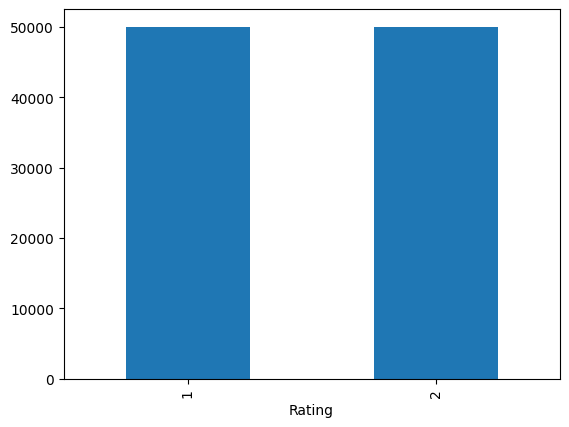

In [117]:
# Analyzing data 
df.groupby('Rating').Rating.count().plot.bar()
plt.show()

# Data Preprocessing

In [118]:
#stop words
nltk.download('stopwords')
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
print(df.columns)

Index(['Rating', 'Title_review'], dtype='object')


In [120]:
df['Title_review'].iloc[0]

"This will not import in itunes for playing on an ipod This was good when I listened on my stereo to a couple of songs, but when I went to import it into itunes for playing on ipod, it will not see the CD. If you are interested in putting this on your ipod don't buy this CD. (Windows Media Play will not recognise this CD either)"

In [121]:
# Data Cleaning using stemmer
stemmer = PorterStemmer()
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['processed_text_column'] = df['Title_review'].apply(preprocess_text)

In [122]:
df = df.drop(['Title_review'], axis=1)

In [123]:
df

,Rating,processed_text_column
2746037,1,import itun play ipod good listen stereo coupl...
697906,2,memphi bell great movi great storylin awesom c...
872258,1,worth bought krussel case protect new w810i co...
3256926,1,fals descript awar im write review clear inacc...
78356,1,buyer bewar free free avoid product free credi...
...,...,...
1218442,1,didnt expect documentari style read fault wasn...
737947,1,hack like movi concern comput hackingbut movi ...
2312618,2,good deal filter best deal found filter last p...
1438995,1,disappoint much potenti littl deliv first chap...


In [124]:
df.head(5)
df.to_csv('cleaned_test.csv')

In [125]:
# Training model

In [126]:
# Training model

from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['processed_text_column']
Y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

#Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])
model = pipeline.fit(X, Y)

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_rating = model.predict(X_test)
print(accuracy_score(y_test,predict_rating))

0.8829333333333333


In [138]:
review = input("Enter review = ")
review_data = {'predict_rating':[review]}
review_data_df = pd.DataFrame(review_data)
predict_data_cat = model.predict(review_data_df['predict_rating'])
print("Predicted rating  = ",predict_data_cat)

Enter review = a'
Predicted rating  =  [2]


In [132]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88      7556
           2       0.88      0.88      0.88      7444

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

[[6670  870]
 [ 886 6574]]


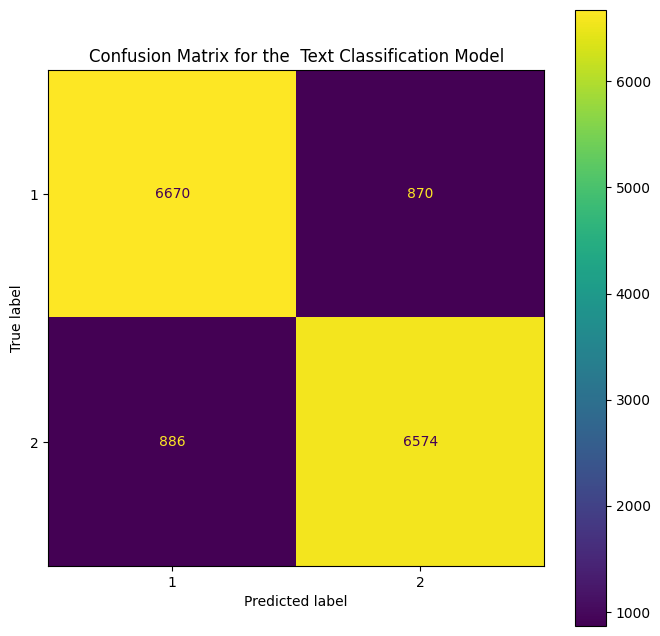

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['1','2']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
ax.set(title='Confusion Matrix for the  Text Classification Model')
display.plot(ax=ax);